# Análise Chocolura

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot as aplot#biblioteca utilizada para fazer estudos de correlação
sns.set_palette('pastel')#deixando o gráfico com paleta de cores
sns.set_style('whitegrid')
print('Bibliotecas importadas com sucesso')

Bibliotecas importadas com sucesso


In [2]:
def plot_comp(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18,loc='left')
    sns.lineplot(x=x,y=y1,data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dataset)
    ax = ax

In [3]:
dados = pd.read_csv('dados/chocolura.csv',sep=',')
dados.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [4]:
dados.dtypes

mes       object
vendas     int64
dtype: object

In [5]:
dados.isna().sum()

mes       0
vendas    0
dtype: int64

In [6]:
dados['mes'] = pd.to_datetime(dados['mes'])
dados.head()

,mes,vendas
0,2017-01-01,210
1,2017-02-01,185
2,2017-03-01,209
3,2017-04-01,280
4,2017-05-01,211


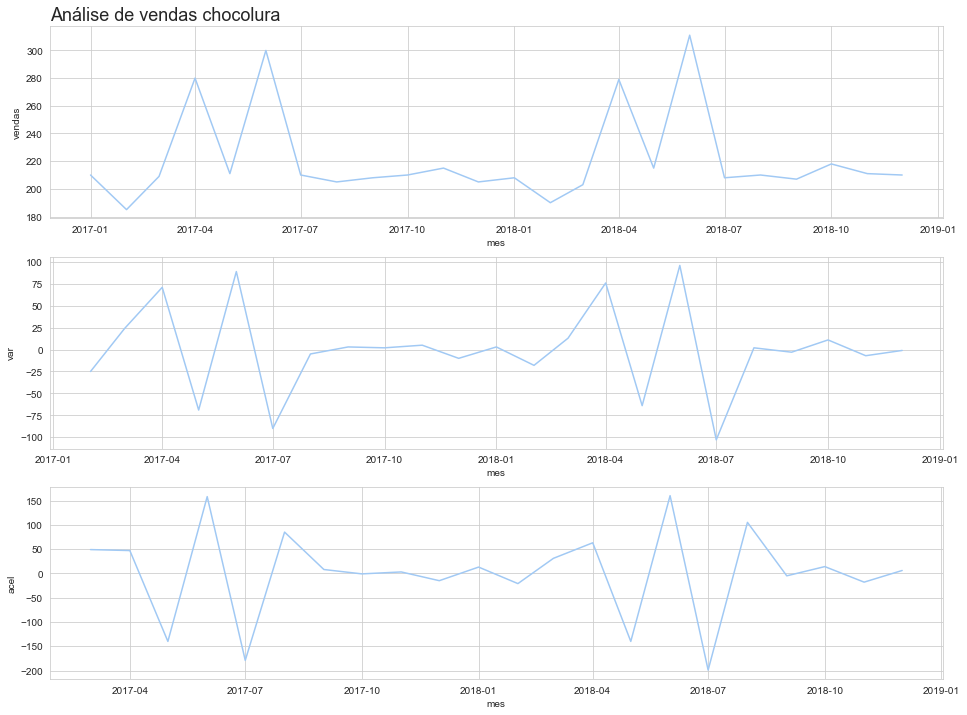

In [7]:
def analise_geral(x,y1,y2,y3,dados,titulo):
    dados[y2] = dados[y1].diff()
    dados[y3] = dados[y2].diff()
    plot_comp(x,y1,y2,y3,dados,titulo)
analise_geral('mes','vendas','var','acel',dados,"Análise de vendas chocolura")

# Chocolura: Análises diárias: Outubro e Novembro

In [8]:
vendas = pd.read_csv('dados/vendas_por_dia.csv',sep=',')
vendas.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [9]:
vendas.shape

(61, 2)

In [10]:
vendas.dtypes

dia       object
vendas     int64
dtype: object

In [11]:
vendas.isna().sum()

dia       0
vendas    0
dtype: int64

In [12]:
vendas['dia'] = pd.to_datetime(vendas['dia'])
vendas.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

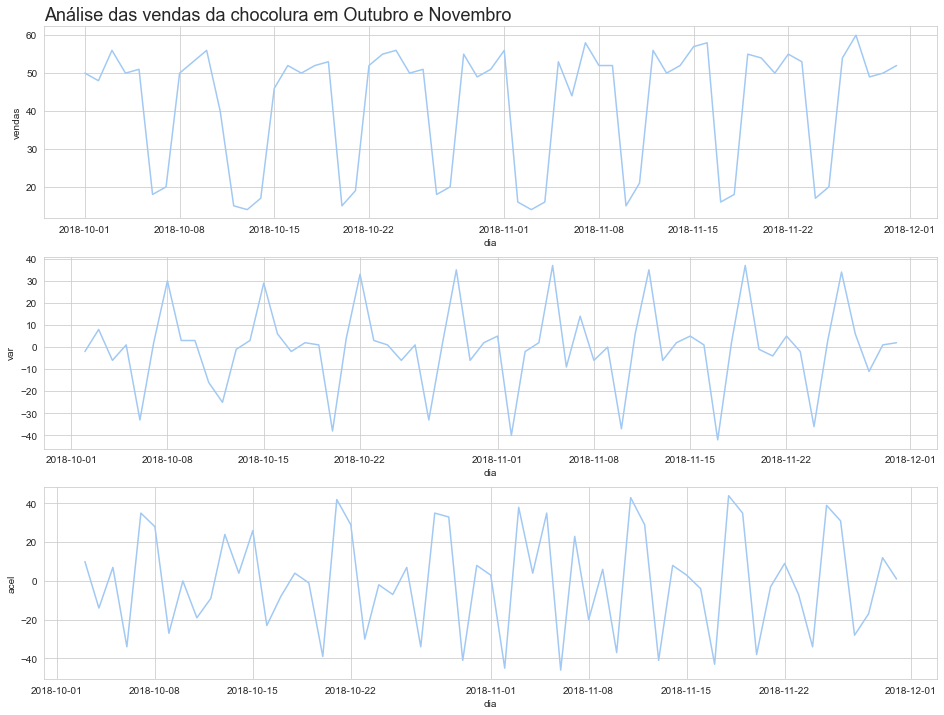

In [13]:
analise_geral('dia','vendas','var','acel',vendas,'Análise das vendas da chocolura em Outubro e Novembro')

## Analisando a sazonalidade

In [14]:
vendas.dtypes

dia       datetime64[ns]
vendas             int64
var              float64
acel             float64
dtype: object

In [15]:
vendas['dia_da_semana'] = vendas['dia'].dt.day_name()#dt.day_name() > Pesquisa o dia da semana daquele dia
vendas.head(7)

,dia,vendas,var,acel,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [16]:
vendas['dia_da_semana'].unique()#montando o dict

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [17]:
tradutor = {'Monday':'Seg',#montando tradução
             'Tuesday':'Ter',
             'Wednesday':'Qua',
             'Thursday':'Qui',
             'Friday':'Sex',
             'Saturday':'Sab',
             'Sunday':'Dom'}

In [18]:
vendas['dia_da_semana'] = vendas['dia_da_semana'].map(tradutor)
vendas.head(7)

,dia,vendas,var,acel,dia_da_semana
0,2018-10-01,50,NaN,NaN,Seg
1,2018-10-02,48,-2.0,NaN,Ter
2,2018-10-03,56,8.0,10.0,Qua
3,2018-10-04,50,-6.0,-14.0,Qui
4,2018-10-05,51,1.0,7.0,Sex
5,2018-10-06,18,-33.0,-34.0,Sab
6,2018-10-07,20,2.0,35.0,Dom


## Analisando sazonalidade diária

In [19]:
vendas_dia = vendas.groupby('dia_da_semana')['vendas','var','acel'].mean().round(2)#verificando dados agrupados por data para procurar insights
vendas_dia

C:\Users\flavi\AppData\Local\Temp\ipykernel_20204\1091834724.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_dia = vendas.groupby('dia_da_semana')['vendas','var','acel'].mean().round(2)#verificando dados agrupados por data para procurar insights


,vendas,var,acel
dia_da_semana,,,
Dom,18.88,3.00,30.75
Qua,53.11,1.44,2.11
Qui,51.33,-1.78,-3.22
Sab,15.88,-27.75,-19.88
Seg,52.33,33.75,30.75
Sex,44.56,-6.78,-5.00
Ter,51.67,-0.67,-34.25


## Correlação das vendas diárias

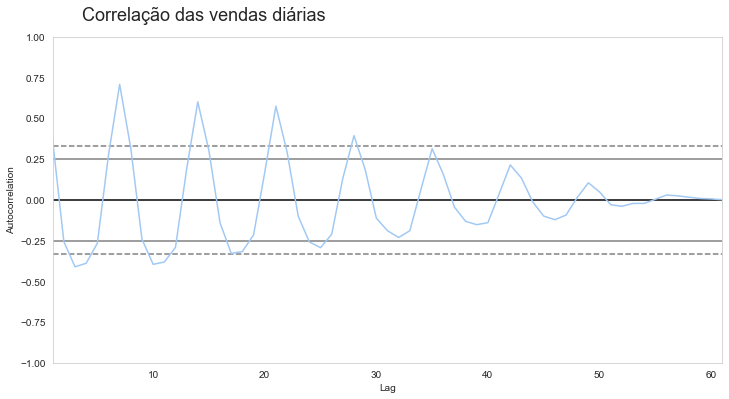

In [20]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias',fontsize=18,x=0.3,y=0.95)
aplot(vendas['vendas'])
ax = ax

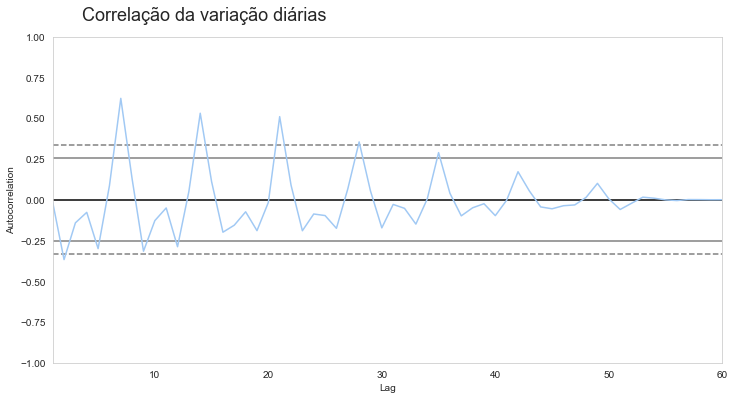

In [21]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da variação diárias',fontsize=18,x=0.3,y=0.95)
aplot(vendas['var'][1:])
ax = ax

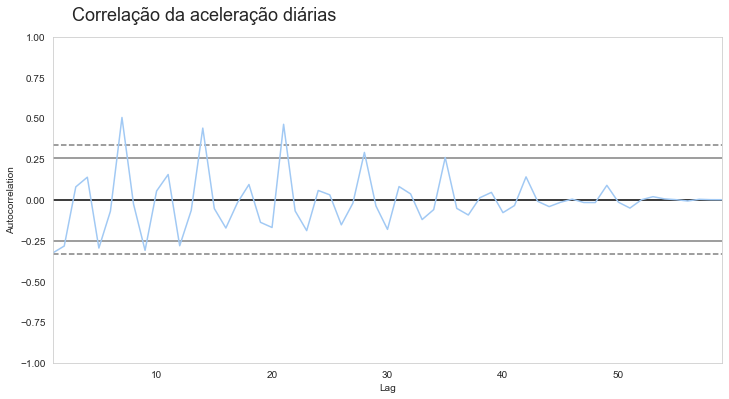

In [22]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração diárias',fontsize=18,x=0.3,y=0.95)
aplot(vendas['acel'][2:])
ax = ax

#### Os gráficos mostram que existe correlação entre o dia da semana e as vendas

# statsmodels

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose#essa biblioteca monta frquencia, ruido e sazonalidade
vendas.head()

,dia,vendas,var,acel,dia_da_semana
0,2018-10-01,50,NaN,NaN,Seg
1,2018-10-02,48,-2.0,NaN,Ter
2,2018-10-03,56,8.0,10.0,Qua
3,2018-10-04,50,-6.0,-14.0,Qui
4,2018-10-05,51,1.0,7.0,Sex


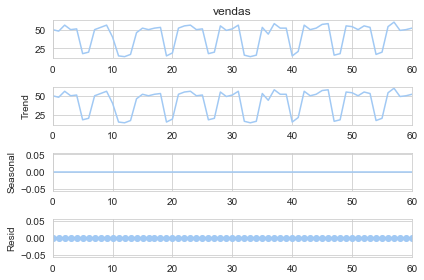

In [30]:
resultado = seasonal_decompose(vendas['vendas'],period=1)#puxando esses dados de uma coluna da df, a parte de periodo ficou bastante confusa
ax = resultado.plot()

In [31]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [32]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,50.0,50.0,0.0,0.0
1,48.0,48.0,0.0,0.0
2,56.0,56.0,0.0,0.0
3,50.0,50.0,0.0,0.0
4,51.0,51.0,0.0,0.0


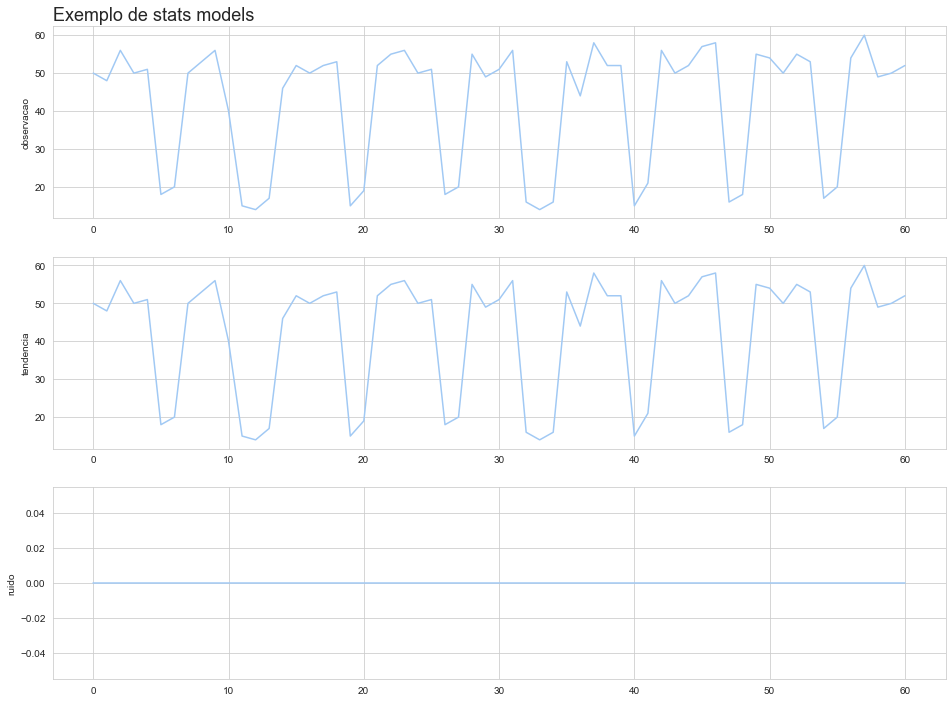

In [34]:
plot_comp(resultado.index,'observacao','tendencia','ruido',resultado,'Exemplo de stats models')